In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Data Dictionary
#ID: ID of the lead
#age: Age of the lead
#current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
#first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
#profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
#website_visits: How many times has a lead visited the website
#time_spent_on_website: Total time spent on the website
#page_views_per_visit: Average number of pages on the website viewed during the visits.
#last_activity: Last interaction between the lead and ExtraaLearn.
    #* Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    #* Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    #* Website Activity: Interacted on live chat with representative, Updated profile on website, etc
#print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
#print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
#digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
#educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
#referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
#status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data
#Suppress warning messages
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Set visual style for seaborn
sns.set(style='whitegrid')


train_df = pd.read_csv("/content/drive/MyDrive/School/Final_project/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/School/Final_project/test.csv")
# Combine for EDA purposes
df = pd.concat([train_df, test_df], ignore_index=True)

# Display the first few rows of the combined dataframe
print(df.head())

# Display the last few rows of the combined dataframe
print(df.tail())

# Display basic information about the dataset
print(df.info())

        ID  age current_occupation first_interaction profile_completed  \
0  EXT3389   56       Professional           Website               Low   
1  EXT2003   19            Student        Mobile App              High   
2  EXT1892   43       Professional        Mobile App              High   
3  EXT2765   45       Professional           Website              High   
4  EXT4044   59         Unemployed        Mobile App            Medium   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               8                   1673                 3.667   
1               3                     95                 2.109   
2               8                   1351                 4.842   
3               5                    255                 5.631   
4               6                   1254                 5.174   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No            No   
1    Phone A

In [ ]:

# Data Overview

# Basic Statistics
print("Basic Statistics:\n", df.describe())

# Data Types
print("\nData Types:\n", df.dtypes)

# Unique Values in Categorical Columns
categorical_columns = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity']
for col in categorical_columns:
    print(f"\nUnique values in {col}:\n", df[col].unique())

# Missing Values
missing_values = df.isnull().sum()
print("\nMissing values in each column:\n", missing_values[missing_values > 0])

# Shape of Data
print(f"\nDataset shape: {df.shape}")

# Range Checks
print("\nValid age range:", df['age'].between(0, 120).all())

# Profile Completion Categories
print("\nProfile completion categories:", df['profile_completed'].unique())

# Last Activity Check
expected_activities = ['Email Activity', 'Phone Activity', 'Website Activity']
print("\nValid last activities:", df['last_activity'].isin(expected_activities).all())

# Dedupe Check
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate entries: {duplicates}")

# Logical Consistency Check
profile_high = df['profile_completed'].value_counts().get('High', 0)
profile_low = df['profile_completed'].value_counts().get('Low', 0)
print("\nProfile completion logic check (High > Low):", profile_high > profile_low)

# Preparing data for modeling using the combined dataframe for EDA
# (Later, we will use train_df and test_df separately for model training/testing)
X = df.drop(['ID', 'status'], axis=1)
y = df['status']

Basic Statistics:
                age  website_visits  time_spent_on_website  \
count  4612.000000     4612.000000            4612.000000   
mean     46.201214        3.566782             724.011275   
std      13.161454        2.829134             743.828683   
min      18.000000        0.000000               0.000000   
25%      36.000000        2.000000             148.750000   
50%      51.000000        3.000000             376.000000   
75%      57.000000        5.000000            1336.750000   
max      63.000000       30.000000            2537.000000   

       page_views_per_visit       status  
count           4612.000000  4612.000000  
mean               3.026126     0.298569  
std                1.968125     0.457680  
min                0.000000     0.000000  
25%                2.077750     0.000000  
50%                2.792000     0.000000  
75%                3.756250     1.000000  
max               18.434000     1.000000  

Data Types:
 ID                        obje

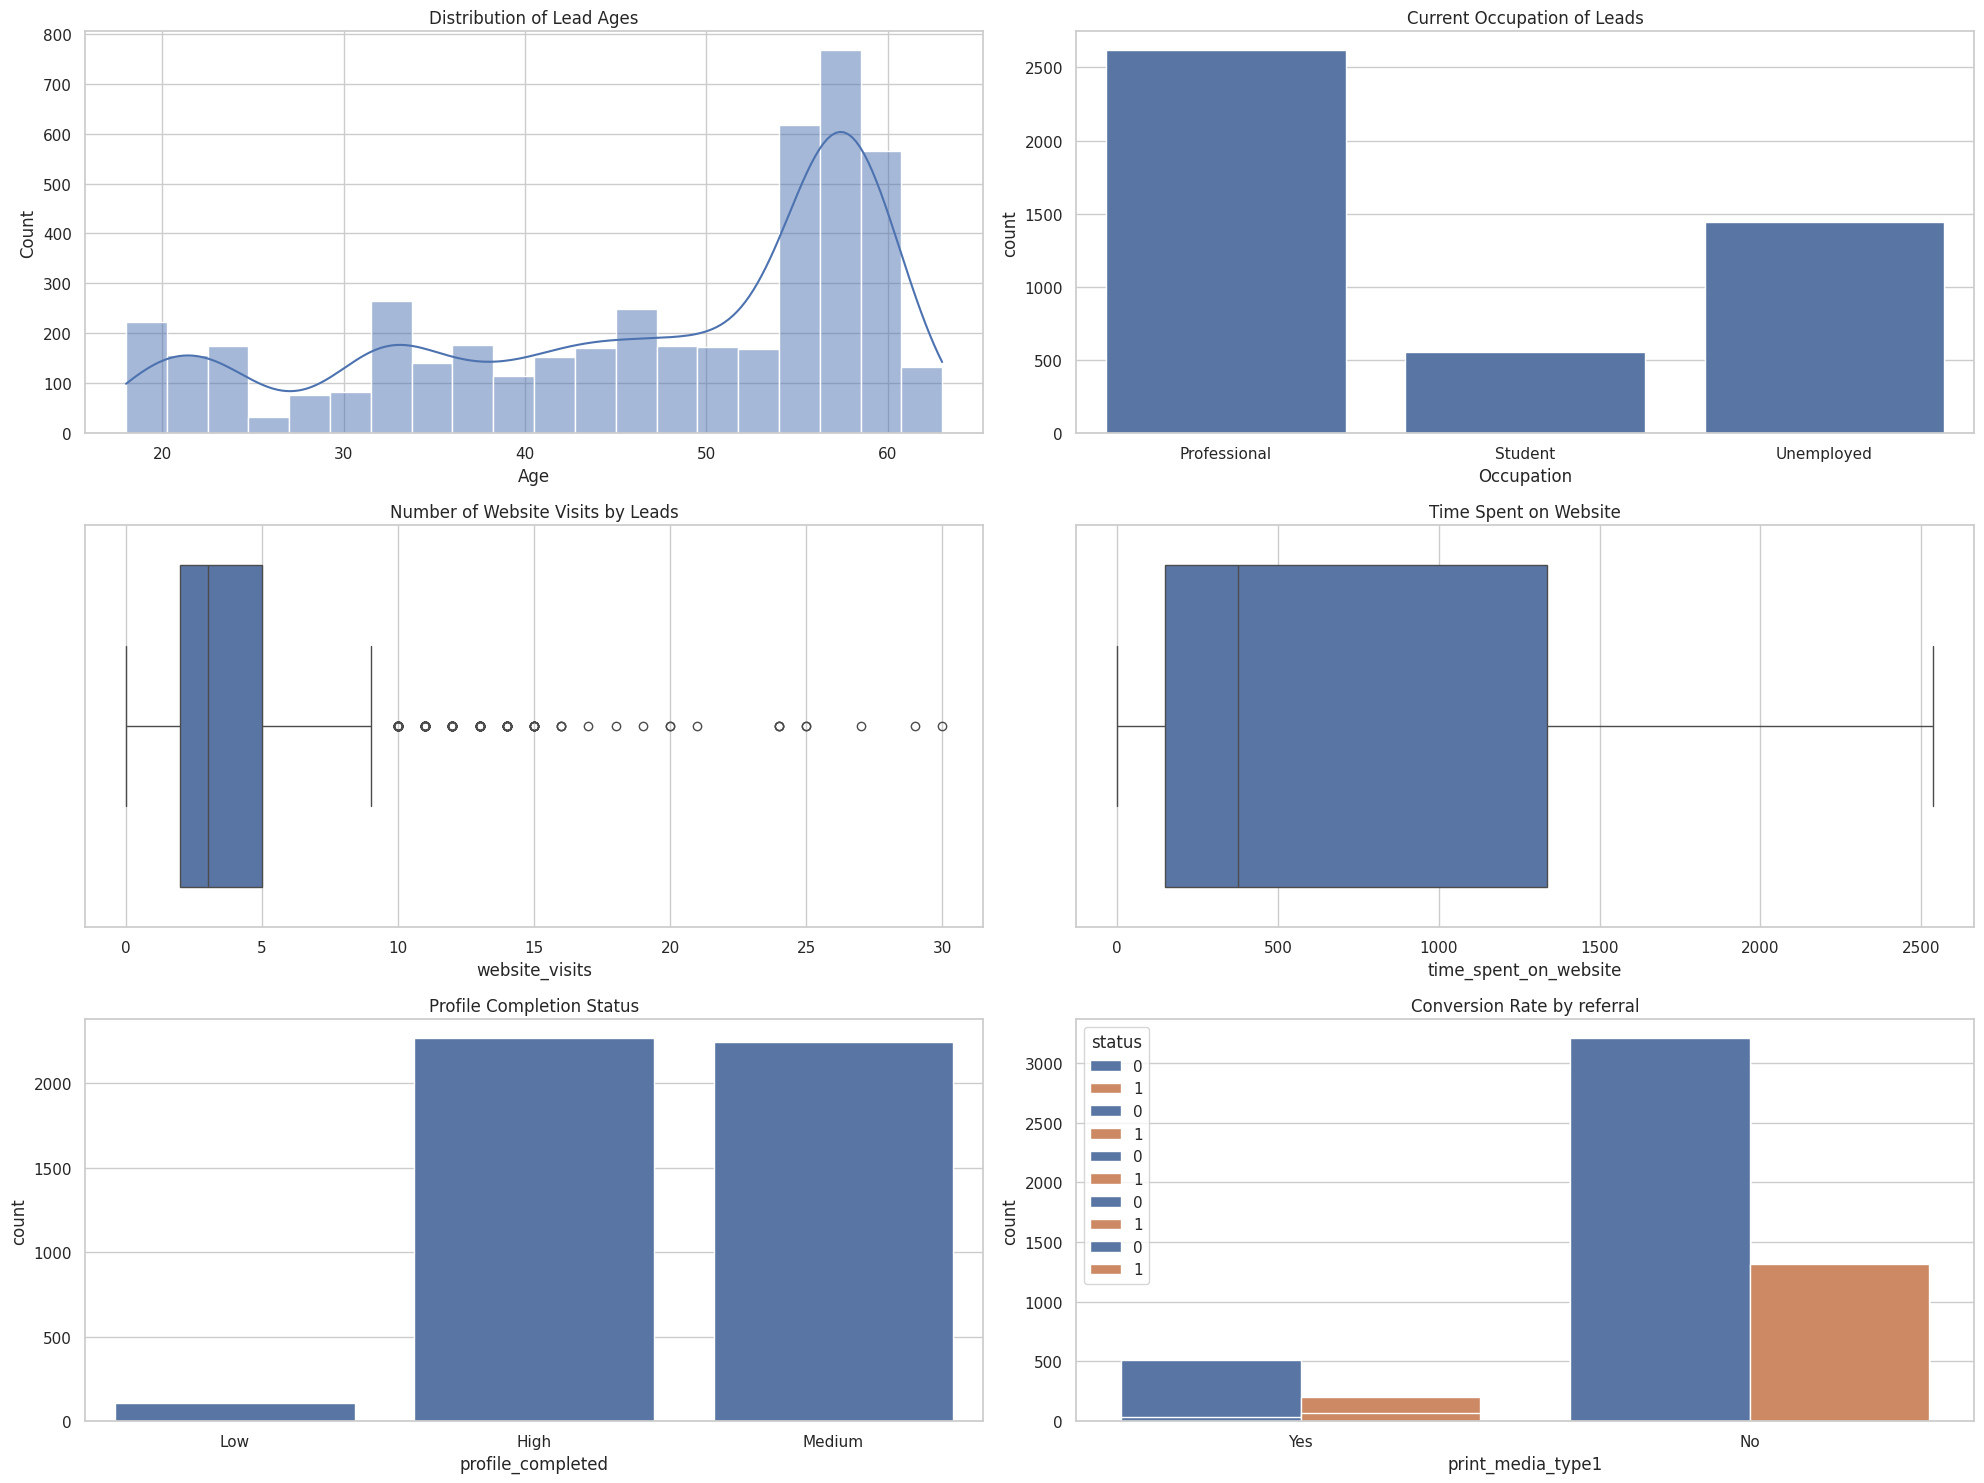

In [ ]:


# Set up the figure for multiple plots
plt.figure(figsize=(20, 15))

# 1. Age Distribution
plt.subplot(3, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Lead Ages')
plt.xlabel('Age')

# 2. Current Occupation Breakdown
plt.subplot(3, 2, 2)
sns.countplot(x='current_occupation', data=df)
plt.title('Current Occupation of Leads')
plt.xlabel('Occupation')

# 3. Website Visits
plt.subplot(3, 2, 3)
sns.boxplot(x='website_visits', data=df)
plt.title('Number of Website Visits by Leads')

# 4. Time Spent on Website
plt.subplot(3, 2, 4)
sns.boxplot(x='time_spent_on_website', data=df)
plt.title('Time Spent on Website')

# 5. Profile Completion
plt.subplot(3, 2, 5)
sns.countplot(x='profile_completed', data=df)
plt.title('Profile Completion Status')

# 6. Conversion Rate by Media Exposure
media_columns = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
for i, col in enumerate(media_columns):
    plt.subplot(3, 2, 6)
    sns.countplot(x=col, hue='status', data=df)
    plt.title(f'Conversion Rate by {col}')

plt.tight_layout()
plt.show()

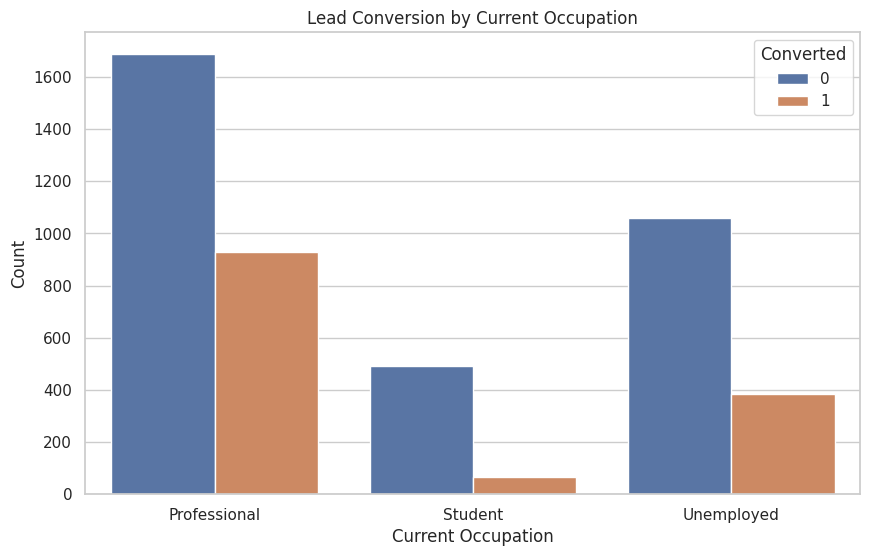

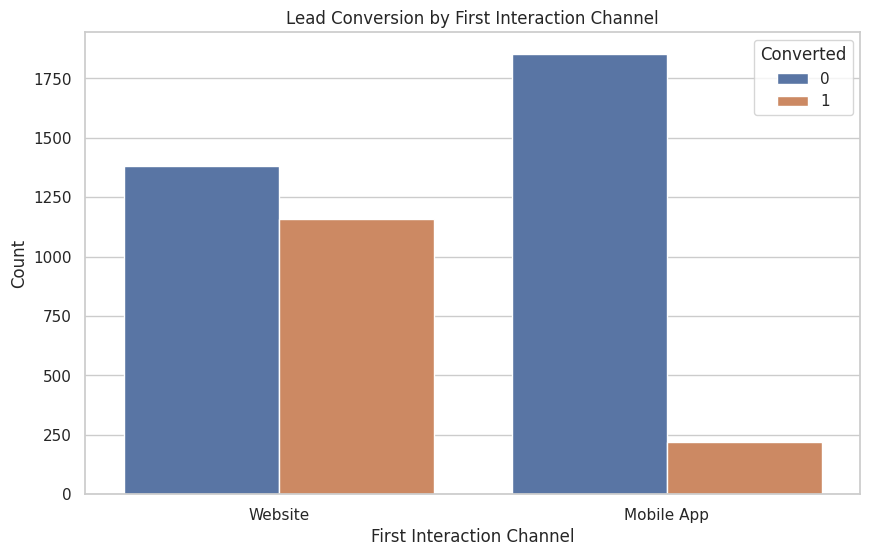

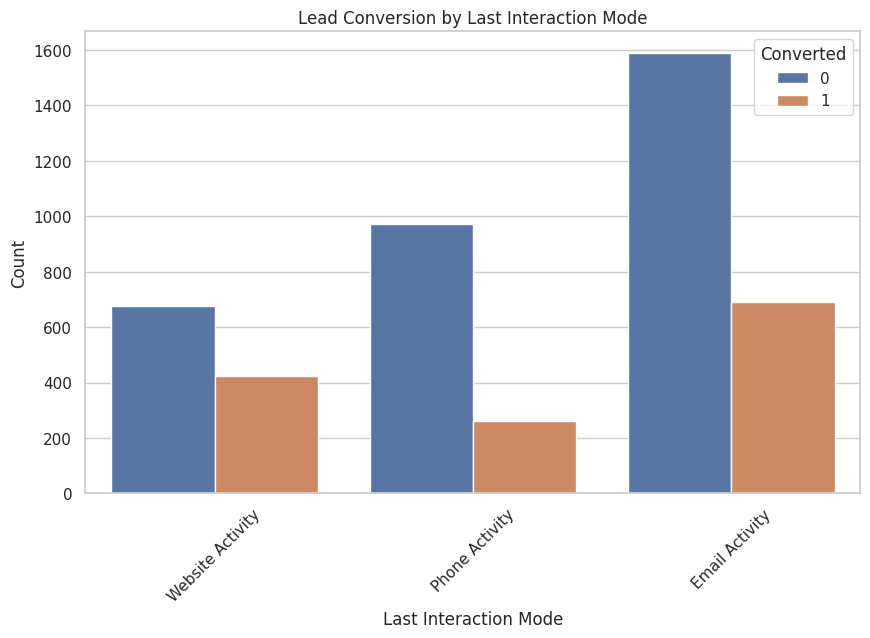

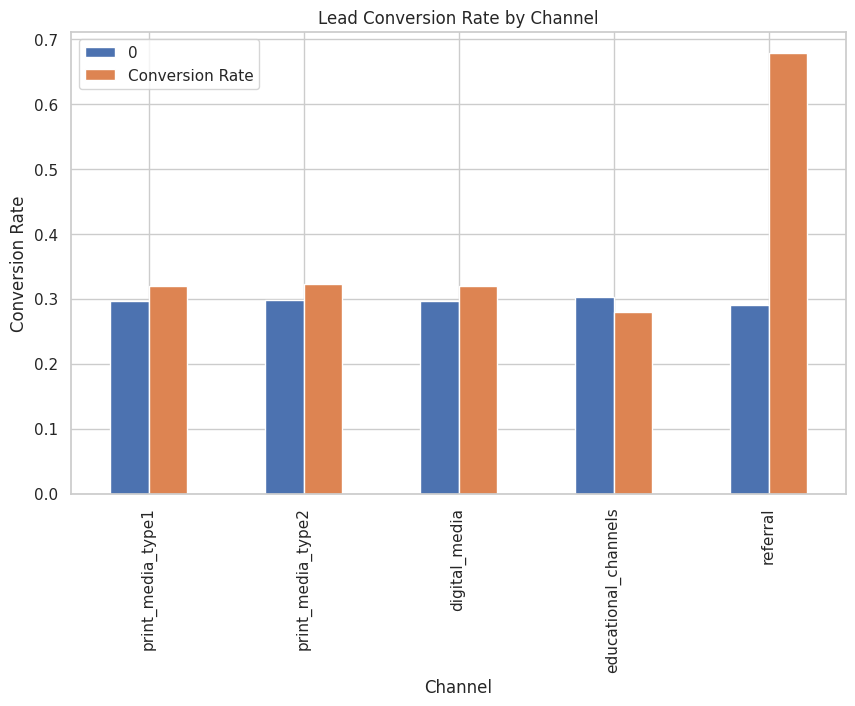

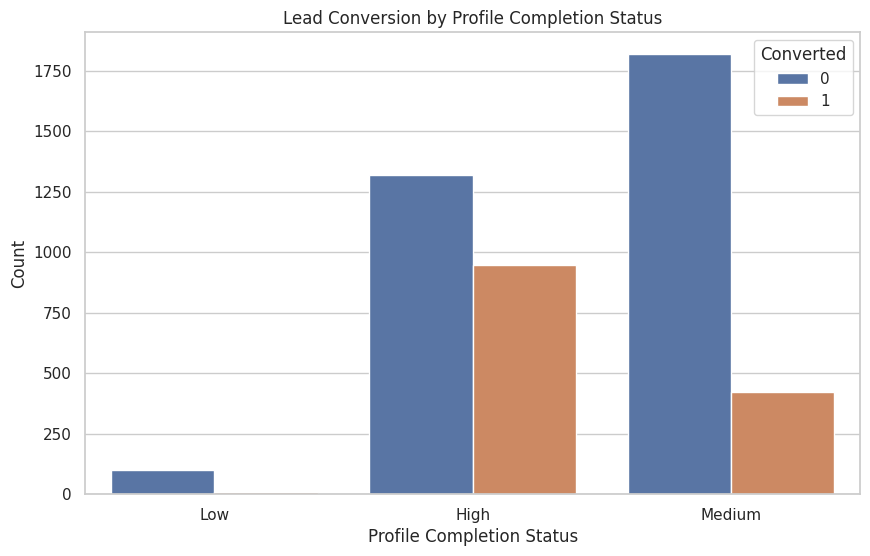

In [ ]:


#1. Analyze how the current occupation impacts lead conversion
plt.figure(figsize=(10, 6))
sns.countplot(x='current_occupation', hue='status', data=df)
plt.title('Lead Conversion by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()

#2. Investigate the effect of the first interaction channel on conversion rates
plt.figure(figsize=(10, 6))
sns.countplot(x='first_interaction', hue='status', data=df)
plt.title('Lead Conversion by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()

#3. Determine mode of interaction yields the best conversion rates
plt.figure(figsize=(10, 6))
sns.countplot(x='last_activity', hue='status', data=df)
plt.title('Lead Conversion by Last Interaction Mode')
plt.xlabel('Last Interaction Mode')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.xticks(rotation=45)
plt.show()

#4. Assess which lead source has the highest conversion rate
media_columns = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']

# DataFrame to hold conversion rates
conversion_rates = {}
for col in media_columns:
    conversion_rate = df.groupby(col)['status'].mean()
    conversion_rates[col] = conversion_rate

conversion_df = pd.DataFrame(conversion_rates).T
conversion_df.columns = [0, 'Conversion Rate']
conversion_df.plot(kind='bar', figsize=(10, 6))
plt.title('Lead Conversion Rate by Channel')
plt.ylabel('Conversion Rate')
plt.xlabel('Channel')
plt.show()

#5. Evaluate if more detailed profiles lead to higher conversion rates
plt.figure(figsize=(10, 6))
sns.countplot(x='profile_completed', hue='status', data=df)
plt.title('Lead Conversion by Profile Completion Status')
plt.xlabel('Profile Completion Status')
plt.ylabel('Count')
plt.legend(title='Converted')
plt.show()


In [ ]:


# Since categorical variables have been encoded, review the current DataFrame
print("Columns after encoding:")
print(df.columns.tolist())

X_train = train_df.drop(['ID', 'status'], axis=1)
y_train = train_df['status']
X_test = test_df.drop(['ID', 'status'], axis=1)
y_test = test_df['status']

# Scaling numerical features
scaler = StandardScaler()
num_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']  # Include all numerical columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Check if 'ID' is in the columns and drop if present
if 'ID' in X_train.columns:
    X_train = X_train.drop(columns=['ID'], axis=1)
if 'ID' in X_test.columns:
    X_test = X_test.drop(columns=['ID'], axis=1)

# One-hot encoding of categorical features in the training set
X_train = pd.get_dummies(X_train, drop_first=True)

# One-hot encoding of categorical features in the testing set
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test with X_train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Fit the model (Random Forest Classifier)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


# Model Training Example (Random Forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Columns after encoding:
['ID', 'age', 'current_occupation', 'first_interaction', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.83      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.86      0.82      0.84       923
weighted avg       0.87      0.87      0.87       923

[[610  39]
 [ 81 193]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.83      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.86      0.82      0.84       923
weighted avg       0.87      0.87      0.87       923

[[610  39]
 [ 81 193]]


In [ ]:


## Building a Decision Tree model

# Ensure that ID is dropped (if not already done)
X_train = X_train.drop(columns=['ID'], axis=1, errors='ignore')
X_test = X_test.drop(columns=['ID'], axis=1, errors='ignore')

# One-hot encoding of categorical features (if needed)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align the columns of X_test with X_train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Create the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Confusion Matrix:
[[561  88]
 [ 93 181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       649
           1       0.67      0.66      0.67       274

    accuracy                           0.80       923
   macro avg       0.77      0.76      0.76       923
weighted avg       0.80      0.80      0.80       923



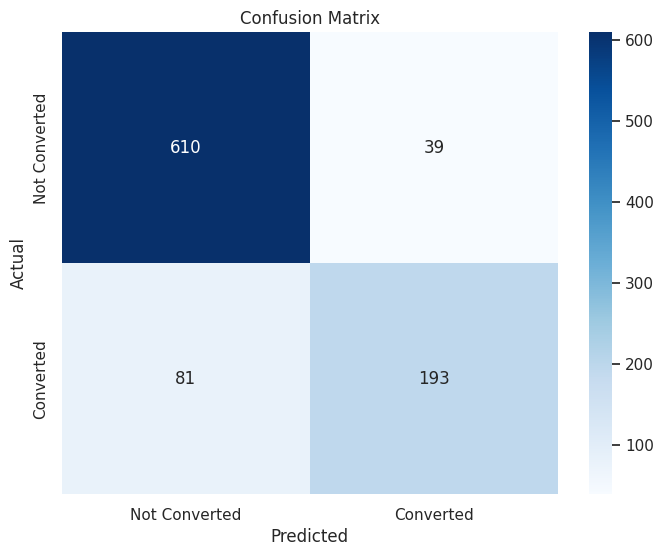

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.83      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.86      0.82      0.84       923
weighted avg       0.87      0.87      0.87       923

Accuracy: 0.87
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (F1): 0.7569290341166969
Cross-validated F1 Score: 0.76 ± 0.03
Feature ranking:
1. Feature time_spent_on_website (0.2829)
2. Feature first_interaction_Website (0.2287)
3. Feature profile_completed_Medium (0.1012)
4. Feature page_views_per_visit (0.0872)
5. Feature age (0.0844)
6. Feature website_visits (0.0467)
7. Feature last_activity_Phone Activity (0.0366)
8. Feature current_occupation_Unemployed (0.0328)
9. Feature current_occupation_Student (0.0225)
10. Feature last_activity_Website Activity (0.0224)
11. Featur

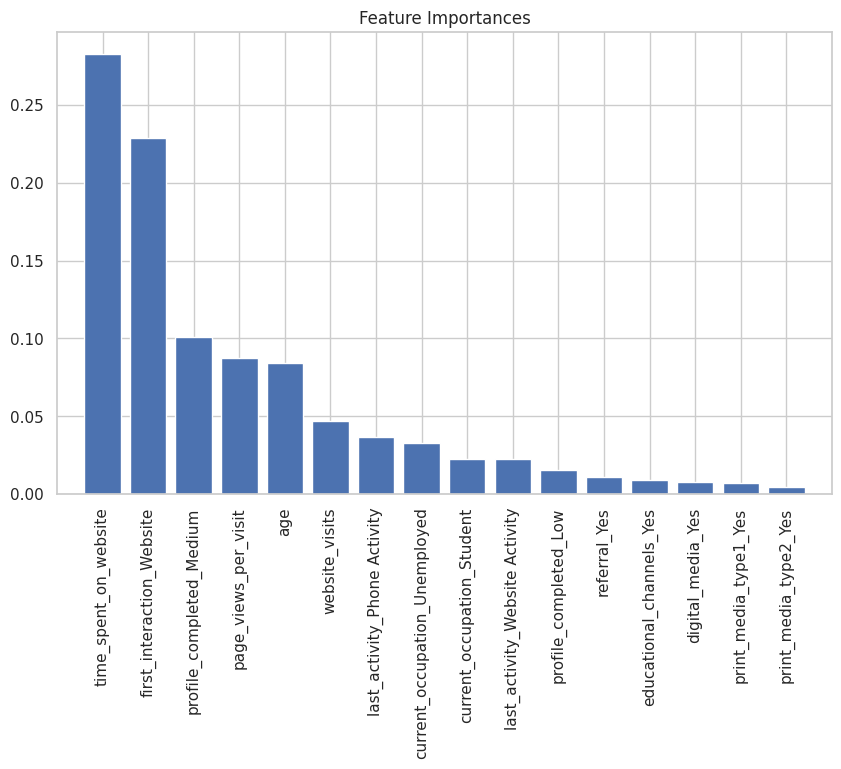

In [ ]:


## Model Performance evaluation and improvement

X_train = train_df.drop(['ID', 'status'], axis=1)
y_train = train_df['status']
X_test = test_df.drop(['ID', 'status'], axis=1)
y_test = test_df['status']

# One-hot encoding of categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
# Align the columns of X_test with X_train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 1. Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predictions
y_pred_rf = rf_model.predict(X_test)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Classification Report and Accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# 5. Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)

# 6. Use the best estimator
best_rf_model = grid_search.best_estimator_

# 7. Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-validated F1 Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# 8. Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]:.4f})")


# Visualization of feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()



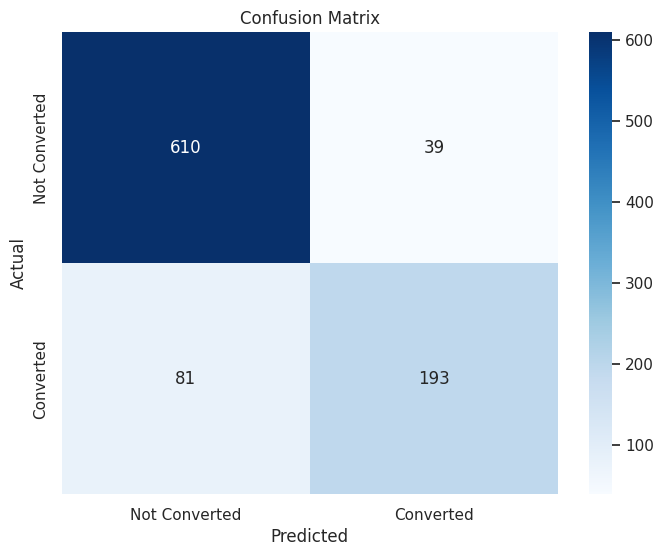

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.83      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.86      0.82      0.84       923
weighted avg       0.87      0.87      0.87       923

Accuracy: 0.87
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (F1): 0.7569290341166969
Cross-validated F1 Score: 0.76 ± 0.03
Feature ranking:
1. Feature time_spent_on_website (0.2829)
2. Feature first_interaction_Website (0.2287)
3. Feature profile_completed_Medium (0.1012)
4. Feature page_views_per_visit (0.0872)
5. Feature age (0.0844)
6. Feature website_visits (0.0467)
7. Feature last_activity_Phone Activity (0.0366)
8. Feature current_occupation_Unemployed (0.0328)
9. Feature current_occupation_Student (0.0225)
10. Feature last_activity_Website Activity (0.0224)
11. Featur

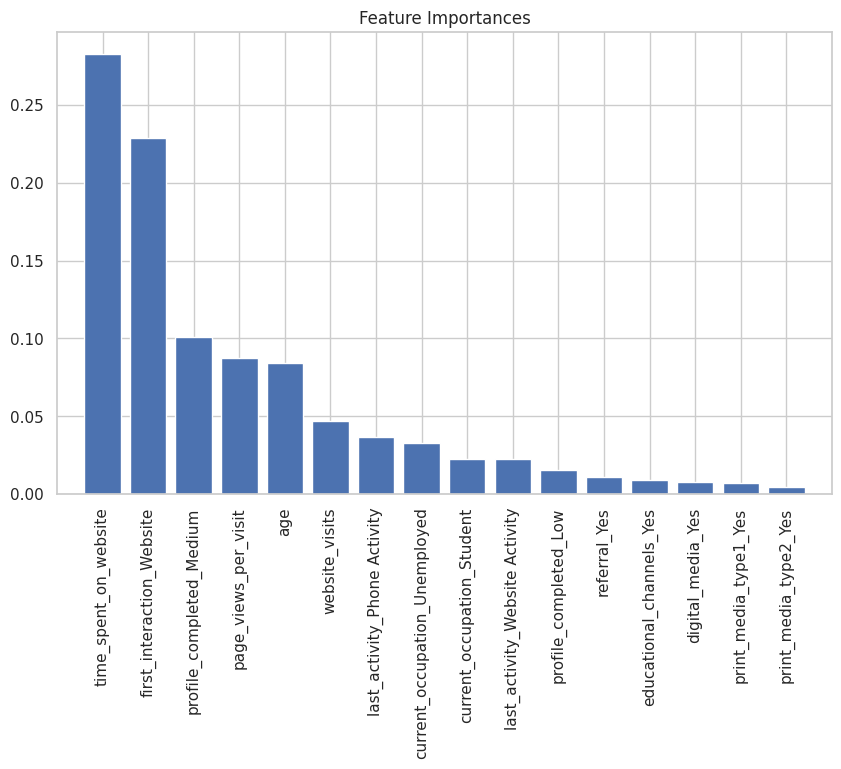

In [ ]:

## Building a Random Forest model

# 1. Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predictions
y_pred_rf = rf_model.predict(X_test)

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Classification Report and Accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# 5. Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)

# 6. Use the best estimator
best_rf_model = grid_search.best_estimator_

# 7. Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-validated F1 Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# 8. Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Visualization of feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

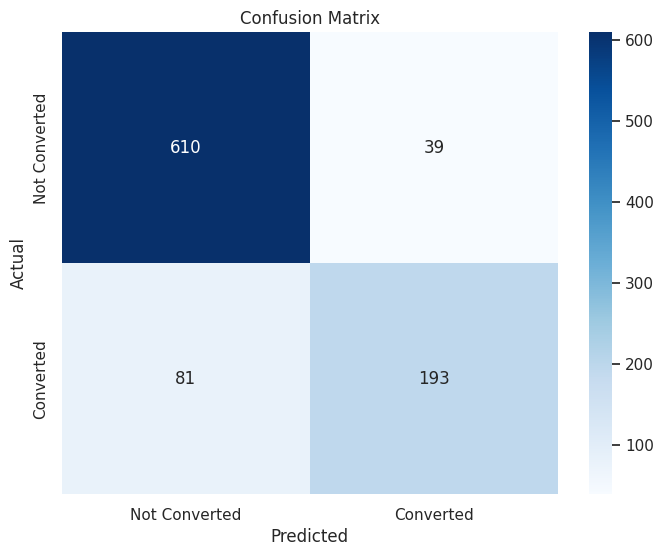

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       649
           1       0.83      0.70      0.76       274

    accuracy                           0.87       923
   macro avg       0.86      0.82      0.84       923
weighted avg       0.87      0.87      0.87       923

Accuracy: 0.87
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score (F1): 0.7569290341166969
Cross-validated F1 Score: 0.76 ± 0.03
Feature ranking:
1. Feature time_spent_on_website (0.2829)
2. Feature first_interaction_Website (0.2287)
3. Feature profile_completed_Medium (0.1012)
4. Feature page_views_per_visit (0.0872)
5. Feature age (0.0844)
6. Feature website_visits (0.0467)
7. Feature last_activity_Phone Activity (0.0366)
8. Feature current_occupation_Unemployed (0.0328)
9. Feature current_occupation_Student (0.0225)
10. Feature last_activity_Website Activity (0.0224)
11. Featur

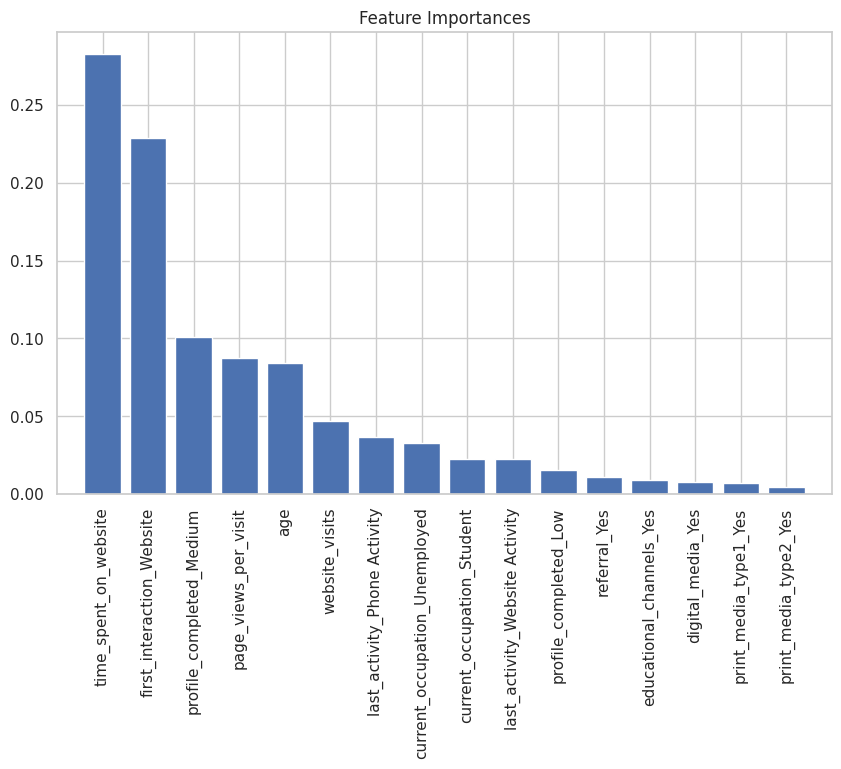

Final Accuracy: 0.88
Final Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       649
           1       0.85      0.72      0.78       274

    accuracy                           0.88       923
   macro avg       0.87      0.83      0.85       923
weighted avg       0.88      0.88      0.87       923



In [ ]:


## Model Performance evaluation and improvement

X = pd.get_dummies(X, drop_first=True)


# Modified Data Splitting for Final Evaluation

X_train = train_df.drop(['ID', 'status'], axis=1)
y_train = train_df['status']
X_test = test_df.drop(['ID', 'status'], axis=1)
y_test = test_df['status']

# One-hot encoding of categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
# Align the columns of X_test with X_train
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# 1. Fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2. Predictions
y_pred_rf = rf_model.predict(X_test)

# 3. Model Performance Evaluation
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report and Accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.2f}")

# 5. Hyperparameter Tuning with Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)

# 6. Use the best estimator
best_rf_model = grid_search.best_estimator_

# 7. Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='f1')
print(f"Cross-validated F1 Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# 8. Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {X_train.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Visualization of feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# 9. Predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# 10. Final Evaluation
final_accuracy = accuracy_score(y_test, y_pred_best_rf)
final_cm = confusion_matrix(y_test, y_pred_best_rf)
print(f"Final Accuracy: {final_accuracy:.2f}")
print("Final Classification Report:")
print(classification_report(y_test, y_pred_best_rf))

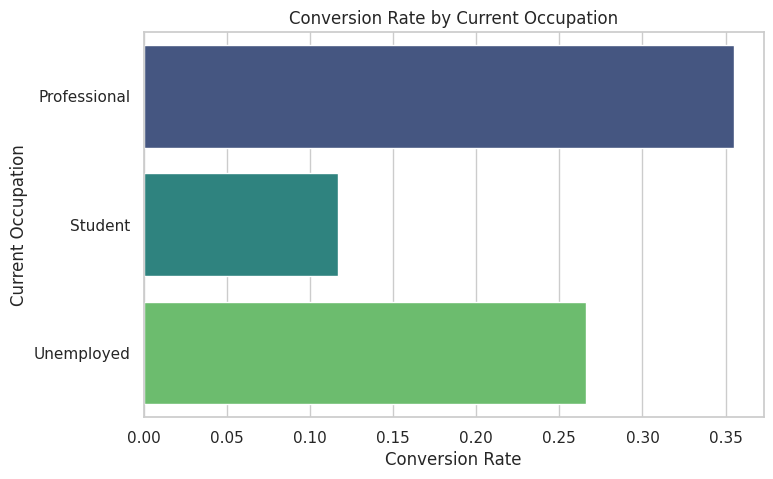

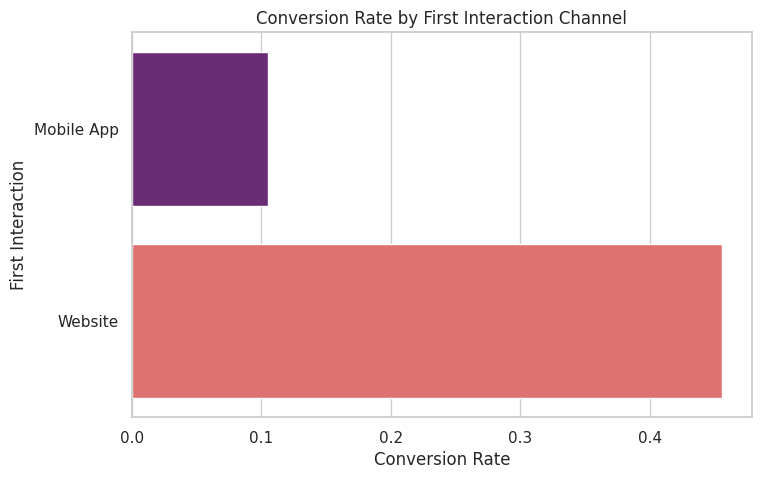

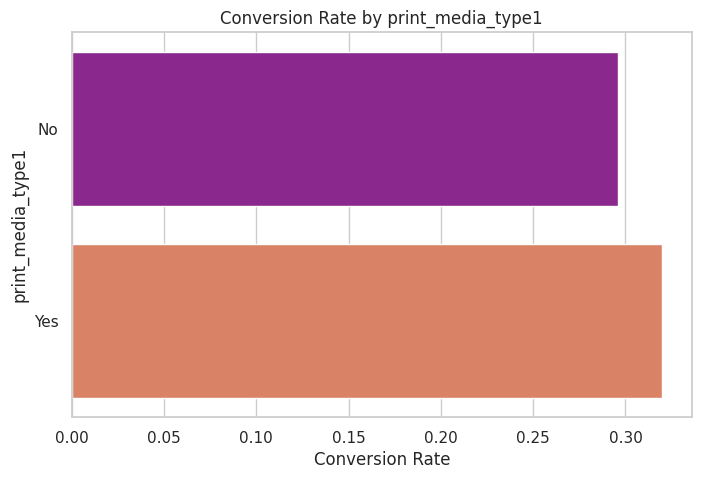

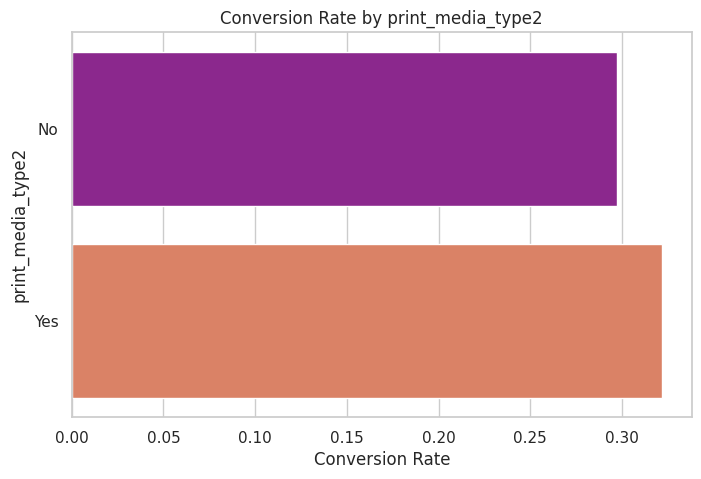

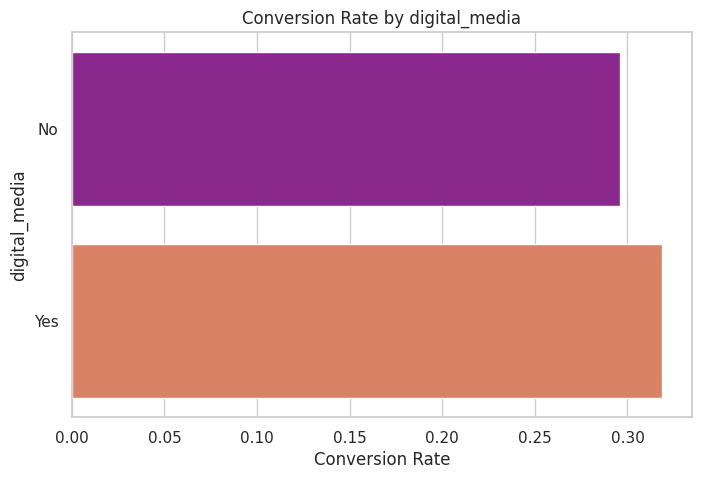

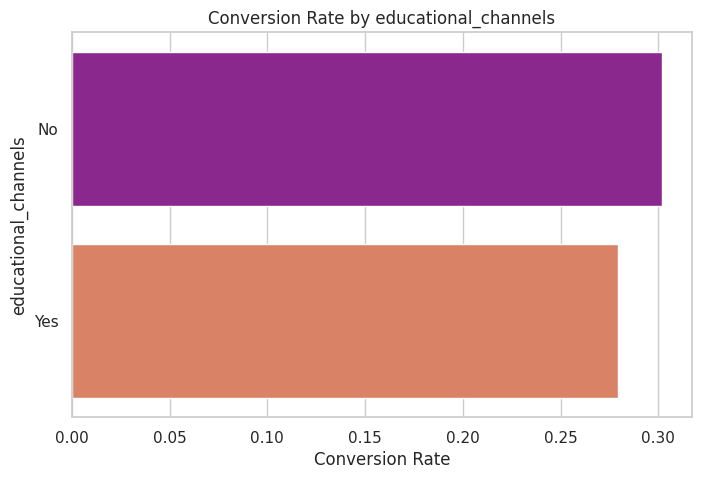

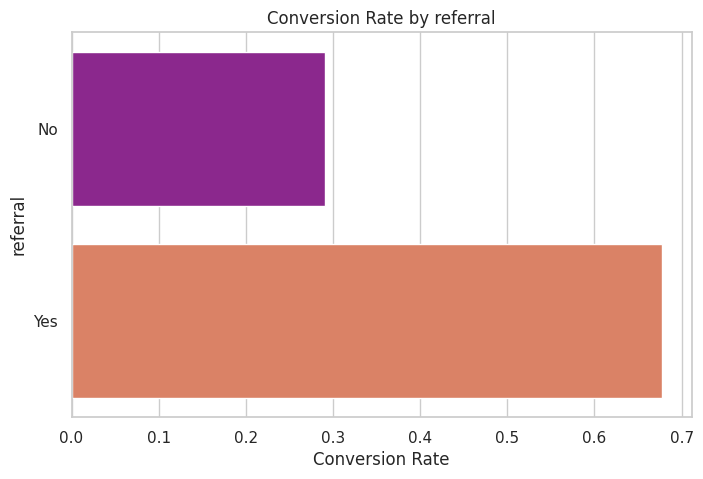

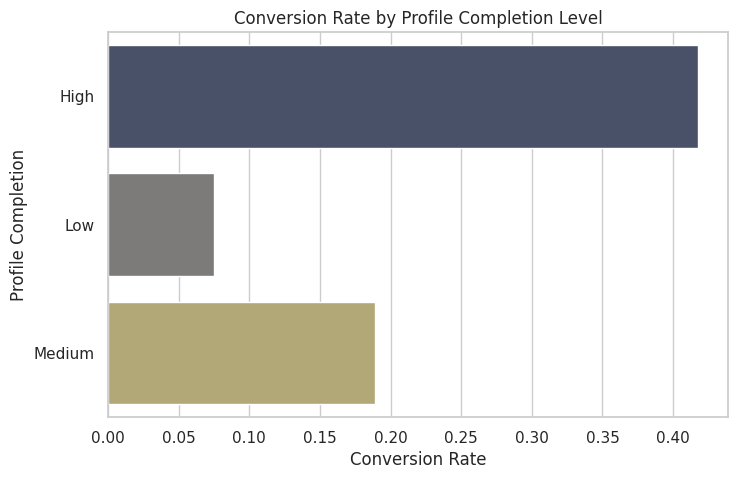

Focus on Professional for targeted marketing.
Enhance customer experience on Website channels.


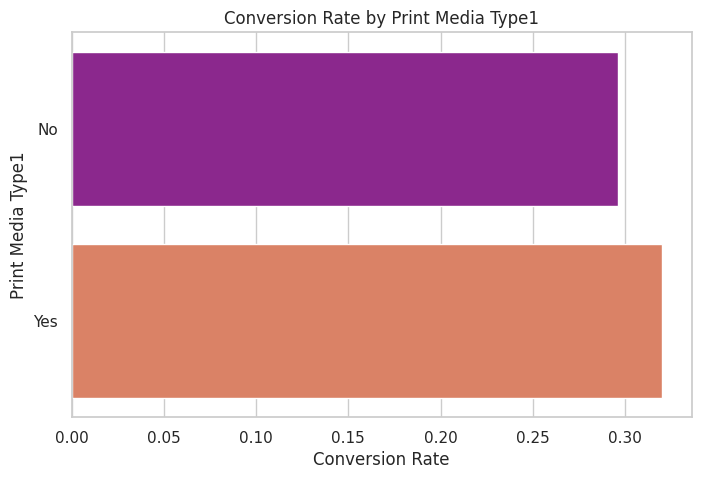

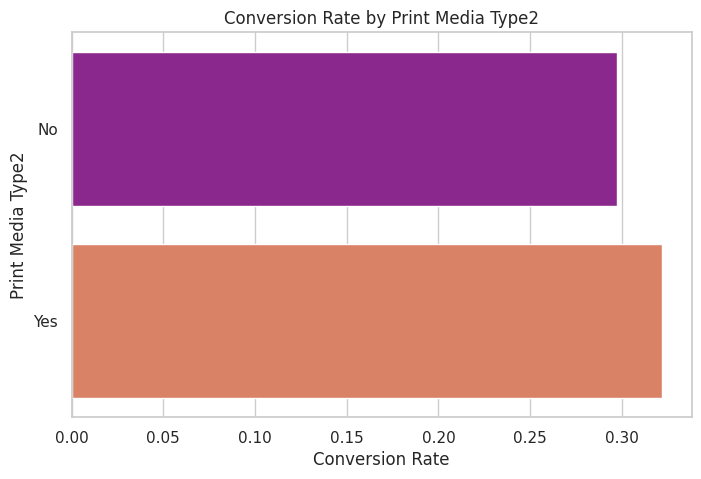

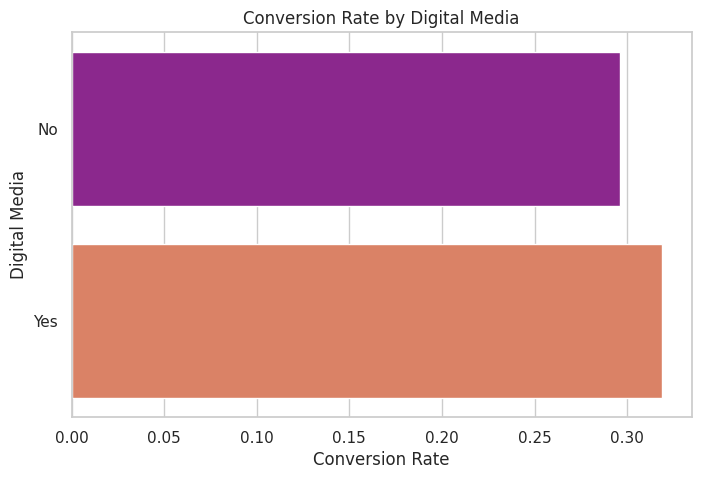

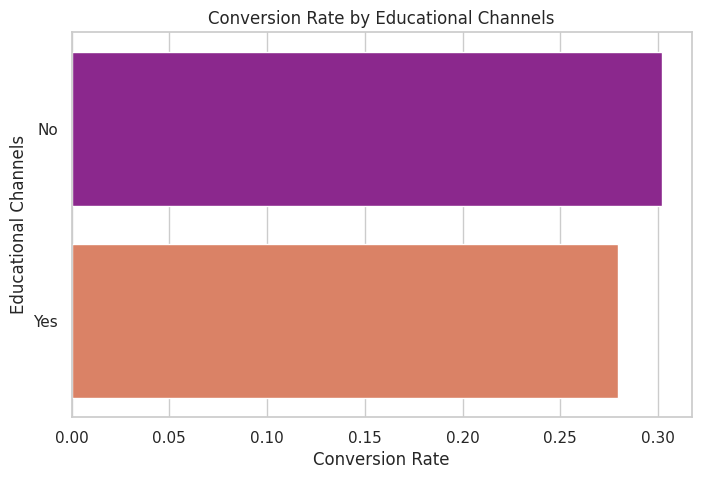

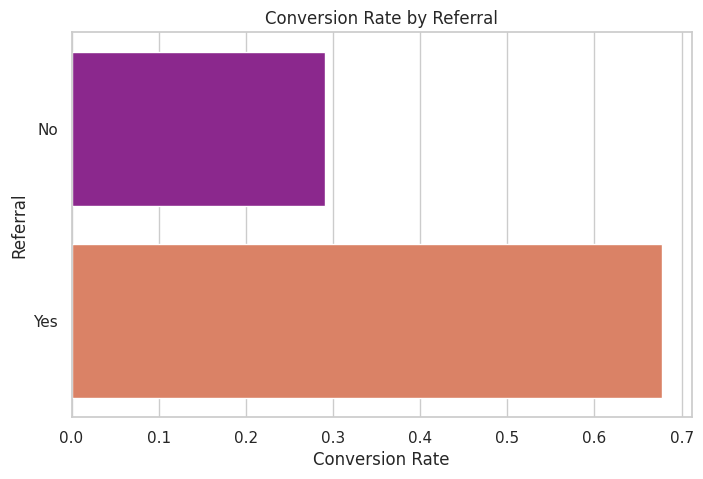

In [ ]:


## Actionable Insights and Recommendations

# 1. Analyze conversion rates by current occupation
occupation_conversion = df.groupby('current_occupation')['status'].mean().reset_index()
occupation_conversion.columns = ['Current Occupation', 'Conversion Rate']

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Conversion Rate', y='Current Occupation', data=occupation_conversion, palette='viridis', hue=None)
plt.title('Conversion Rate by Current Occupation')
plt.show()

# 2. Analyze conversion rates by first interaction channel
interaction_conversion = df.groupby('first_interaction')['status'].mean().reset_index()
interaction_conversion.columns = ['First Interaction', 'Conversion Rate']

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Conversion Rate', y='First Interaction', data=interaction_conversion, palette='magma')
plt.title('Conversion Rate by First Interaction Channel')
plt.show()

# 3. Check interaction methods
interaction_methods = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
for method in interaction_methods:
    method_conversion = df.groupby(method)['status'].mean().reset_index()
    method_conversion.columns = [method, 'Conversion Rate']

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Conversion Rate', y=method, data=method_conversion, palette='plasma', hue=None)
    plt.title(f'Conversion Rate by {method}')
    plt.xlabel('Conversion Rate')
    plt.ylabel(method)
    plt.show()


# 4. Profile completion analysis
profile_completion = df.groupby('profile_completed')['status'].mean().reset_index()
profile_completion.columns = ['Profile Completion', 'Conversion Rate']

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x='Conversion Rate', y='Profile Completion', data=profile_completion, palette='cividis', hue=None)
plt.title('Conversion Rate by Profile Completion Level')
plt.show()

# 5. Recommendations for targeted campaigns
def recommend_campaigns(df):
    targeted_groups = []
    high_conversion_occupation = df.groupby('current_occupation')['status'].mean().idxmax()
    targeted_groups.append(f"Focus on {high_conversion_occupation} for targeted marketing.")

    high_conversion_interaction = df.groupby('first_interaction')['status'].mean().idxmax()
    targeted_groups.append(f"Enhance customer experience on {high_conversion_interaction} channels.")

    return targeted_groups

recommendations = recommend_campaigns(df)

# Print recommendations
for recommendation in recommendations:
    print(recommendation)

# Plotting conversion rates by method
interaction_methods = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
for method in interaction_methods:
    method_conversion = df.groupby(method)['status'].mean().reset_index()
    method_conversion.columns = [method, 'Conversion Rate']

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Conversion Rate', y=method, data=method_conversion, palette='plasma', hue=None)
    plt.title(f'Conversion Rate by {method.replace("_", " ").title()}')
    plt.xlabel('Conversion Rate')
    plt.ylabel(method.replace("_", " ").title())
    plt.show()



In [ ]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with a random state for reproducibility
logreg_model = LogisticRegression(random_state=42)

# Train the model using the training data (X_train, y_train)
logreg_model.fit(X_train, y_train)

# Make predictions on the test data (X_test)
y_pred_logreg = logreg_model.predict(X_test)

# Print the confusion matrix to evaluate the model's performance
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

# Print the classification report to get detailed metrics (precision, recall, F1-score, etc.)
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression - Confusion Matrix:
[[581  68]
 [112 162]]

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       649
           1       0.70      0.59      0.64       274

    accuracy                           0.80       923
   macro avg       0.77      0.74      0.75       923
weighted avg       0.80      0.80      0.80       923



In [ ]:
from sklearn.svm import SVC  # Import the SVM classifier

# Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to your training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nSVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM - Confusion Matrix:
[[570  79]
 [ 81 193]]

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       649
           1       0.71      0.70      0.71       274

    accuracy                           0.83       923
   macro avg       0.79      0.79      0.79       923
weighted avg       0.83      0.83      0.83       923

